<h1 align=center><font size = 5>Trabajo Práctico Módulo 1: 
Exploración de Datos </font></h1> 




### **Tabla de contenidos**

  1. [Importacion de librerias](#q1) 
  2. [Empezamos explorando el dataset para entenderlo](#q2)
  3. [Ahora hacemos limpieza de datos](#q3)
  4. [Análisis de Distribución Univariada de las columnas](#q4)
  5. [Calculamos la proporción de ventas en monto de ventas (Pesos) y en unidades (Q) por categoría y brand](#q5)






### Importación de librerías <a name="q1"></a>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statistics as stat
import pyarrow.parquet as pq #Necesaria para leer el parquet
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Para transformar la notación científica

### Empezamos explorando el dataset para entenderlo <a name="q2"></a>




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP1/smallersampleddf.parquet')

In [ ]:
# Vemos las primeras filas

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
35424599,2019-10-26 11:31:49 UTC,view,2701884,2053013563911439225,appliances.kitchen.refrigerators,beko,539.430,545113235,a76b16f6-99e8-4568-91ba-8d0594f6dc8c
33954915,2019-10-25 10:47:09 UTC,view,47900002,2116907525201723525,None,tacx,154.190,546093570,4106f0e7-6464-4e7a-a96d-6942b765df15
3239063,2019-10-03 15:50:59 UTC,view,1003317,2053013555631882655,electronics.smartphone,apple,965.020,521171518,4069de18-c57b-4c5f-b96a-530af56e2af8
18744048,2019-10-14 18:05:20 UTC,view,4802233,2053013554658804075,electronics.audio.headphone,jbl,46.080,559456286,e2120413-0bbb-42cb-9205-49d92457a5cf
6966925,2019-10-06 11:45:33 UTC,view,1005153,2053013555631882655,electronics.smartphone,xiaomi,231.640,533559597,a6ee7e6a-8849-4c8c-8cb7-c76bd0e85e87


In [ ]:
#Vemos la cantidad de filas y columnas del dataset

print("El dataset cuenta con", df.shape[0], "filas y", df.shape[1], "columnas")

El dataset cuenta con 2020300 filas y 9 columnas


In [ ]:
# Vemos Información del DataSet en general

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020300 entries, 35424599 to 42448734
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 154.1+ MB


### Ahora hacemos limpieza de datos <a name="q3"></a>

In [ ]:
# Vemos que la columna event_time es un objeto por lo tanto la cambiamos a columa tipo datatime

df['event_time']=pd.to_datetime(df['event_time'],format='%Y-%m-%d %H:%M:%S UTC')

In [ ]:
#Vemos si hay filas completas duplicadas y las eliminamos

print(df.duplicated().sum())
cleaned_df = df.drop_duplicates().copy()

1844


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018456 entries, 35424599 to 42448734
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 154.0+ MB


In [ ]:
cleaned_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
35424599,2019-10-26 11:31:49,view,2701884,2053013563911439225,appliances.kitchen.refrigerators,beko,539.430,545113235,a76b16f6-99e8-4568-91ba-8d0594f6dc8c
33954915,2019-10-25 10:47:09,view,47900002,2116907525201723525,None,tacx,154.190,546093570,4106f0e7-6464-4e7a-a96d-6942b765df15
3239063,2019-10-03 15:50:59,view,1003317,2053013555631882655,electronics.smartphone,apple,965.020,521171518,4069de18-c57b-4c5f-b96a-530af56e2af8
18744048,2019-10-14 18:05:20,view,4802233,2053013554658804075,electronics.audio.headphone,jbl,46.080,559456286,e2120413-0bbb-42cb-9205-49d92457a5cf
6966925,2019-10-06 11:45:33,view,1005153,2053013555631882655,electronics.smartphone,xiaomi,231.640,533559597,a6ee7e6a-8849-4c8c-8cb7-c76bd0e85e87


In [ ]:
#Agregamos columnas con el día de la semana con el que se corresponde cada evento y la hora (sin minutos ni segundos) y día del mes

In [ ]:
cleaned_df['hour'] = cleaned_df['event_time'].apply(lambda time: time.hour)

In [ ]:
cleaned_df['day_of_week'] = cleaned_df['event_time'].apply(lambda time: time.dayofweek)

In [ ]:
cleaned_df['day'] = cleaned_df['day_of_week'].apply(lambda x: 'Lunes' if x == 0 else 'Martes' if x == 1
                                 else 'Miercoles' if x == 2 else 'Jueves' if x == 3
                                 else 'Viernes' if x== 4 else 'Sabado' if x == 5
                                 else 'Domingo' )

In [ ]:
cleaned_df['dayofmonth'] = cleaned_df['event_time'].apply(lambda time: time.day)

In [ ]:
print("El dataset limpio cuenta con", cleaned_df.shape[0], "filas y", cleaned_df.shape[1], 
      "columnas, luego de haber eliminado", df.duplicated().sum()
, "filas")

El dataset limpio cuenta con 2018456 filas y 13 columnas, luego de haber eliminado 1844 filas


### Análisis de Distribución Univariada de las columnas <a name="q4"></a>

In [ ]:
# Vemos medidas descriptivas de TODOS LOS CAMPOS

cleaned_df.describe(include = "all", datetime_is_numeric=True)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week,day,dayofmonth
count,2018456,2018456,2018456.000,2018456.000,1385939,1738614,2018456.000,2018456.000,2018456,2018456.000,2018456.000,2018456,2018456.000
unique,NaN,3,nan,nan,126,2883,nan,nan,926885,nan,nan,7,nan
top,NaN,view,nan,nan,electronics.smartphone,samsung,nan,nan,7fadc7da-51d4-4bf1-85a1-7ca42e385db5,nan,nan,Martes,nan
freq,NaN,1865343,nan,nan,572474,266325,nan,nan,262,nan,nan,319843,nan
mean,2019-10-16 08:30:23.621094400,NaN,10225655.010,2057065439129677056.000,NaN,NaN,279.637,532318759.251,NaN,11.047,2.963,NaN,15.873
min,2019-10-01 00:00:18,NaN,1000978.000,2053013552226107648.000,NaN,NaN,0.000,184265397.000,NaN,0.000,0.000,NaN,1.000
25%,2019-10-09 07:07:50,NaN,1005121.000,2053013555321504256.000,NaN,NaN,64.090,515409957.000,NaN,7.000,1.000,NaN,9.000
50%,2019-10-16 07:51:57,NaN,4804137.000,2053013555631882752.000,NaN,NaN,158.310,526723367.000,NaN,11.000,3.000,NaN,16.000
75%,2019-10-23 11:31:44.249999872,NaN,15600008.000,2053013563173241600.000,NaN,NaN,335.920,549440138.000,NaN,15.000,5.000,NaN,23.000
max,2019-10-31 23:59:50,NaN,60500009.000,2175419595093967616.000,NaN,NaN,2574.070,566279448.000,NaN,23.000,6.000,NaN,31.000


Algunas conclusiones iniciales, analizando las columnas:

-Columna event_time: vemos que el primer valor se da el 2019-10-01 a las 00:00:18 y el último el 2019-10-31 a las 23:59:50 pudiendo concluir que se trata de un dataset que comprende datos correspondientes al mes de octubre del año 2019.

-Event_type: vemos que hay 3 eventos diferentes: view, cart y purchase (unique) 

-En category_code tenemos 126 categorías diferentes

-User_session: en este mes hubo un total de 926.885 sesiones que dieron origen a esos 2.018.456 de eventos

-Hay un total de 2.018.456 registros, excepto para category_code y brand lo que significa que esas columnas tienen valores nulos, lo cual se verifica en las próximas celdas.

In [ ]:
#Analizamos por cuántos usuarios fueron generados esos eventos

print("Los 2018456 eventos fueron generados por", len(cleaned_df['user_id'].unique()), "usuarios.")

Los 2018456 eventos fueron generados por 546792 usuarios.


In [ ]:
#Vemos la cantidad de nulos por columna

cleaned_df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    632517
brand            279842
price                 0
user_id               0
user_session          0
hour                  0
day_of_week           0
day                   0
dayofmonth            0
dtype: int64

In [ ]:
#Vemos la proporción de nulos por columna

percent_missing = cleaned_df.isnull().sum() / len(cleaned_df)
percent_missing

event_time      0.000
event_type      0.000
product_id      0.000
category_id     0.000
category_code   0.313
brand           0.139
price           0.000
user_id         0.000
user_session    0.000
hour            0.000
day_of_week     0.000
day             0.000
dayofmonth      0.000
dtype: float64

In [ ]:
#Creamos tres df: uno unicamente con el evento "purchase", otro con el evento "cart" y por último uno con elevento "view"

cleaned_df_purchase = cleaned_df[cleaned_df.event_type == 'purchase']
cleaned_df_cart = cleaned_df[cleaned_df.event_type == 'cart']
cleaned_df_view = cleaned_df[cleaned_df.event_type == 'view']

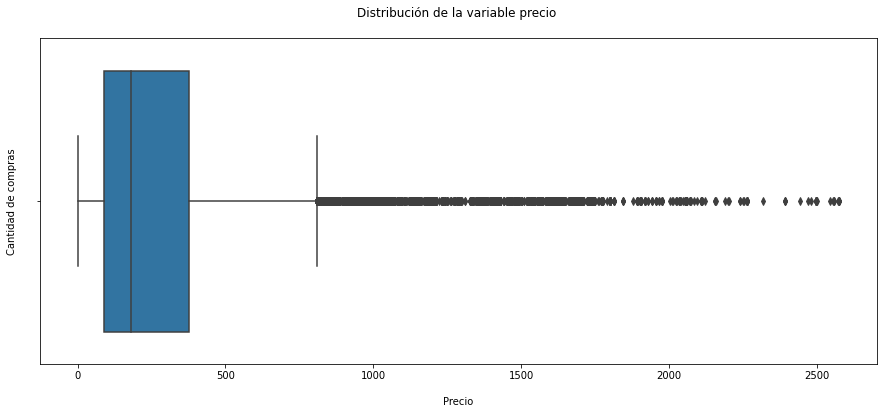

In [ ]:
#Analizamos la distribución de la variable precio (de las compras) mediante un boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x=cleaned_df_purchase.price)
plt.title('Distribución de la variable precio \n')
plt.xlabel("\nPrecio")
plt.ylabel("Cantidad de compras\n")
plt.show()

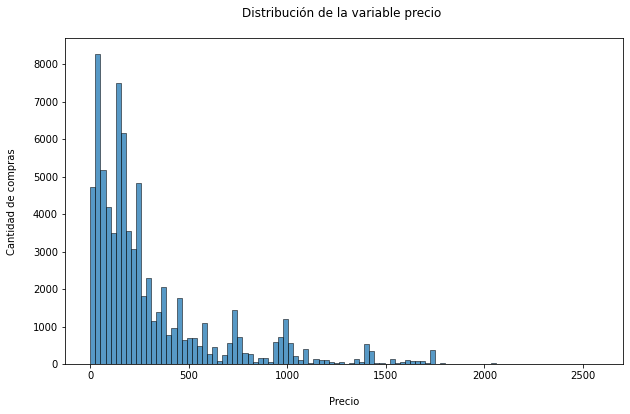

In [ ]:
#Analizamos la distribución de la variable precio (de las compras) mediante un histograma

plt.figure(figsize=(10,6))
plt.title('Distribución de la variable edad \n')
sns.histplot(x=cleaned_df_purchase.price, kde=False, bins= 100)
plt.title('Distribución de la variable precio \n')
plt.xlabel("\nPrecio")
plt.ylabel("Cantidad de compras\n")
plt.show()

In [ ]:
#Analizamos qué eventos se han generado y en qué cantidad/porcentaje

cleaned_df.event_type.value_counts()

view        1865343
purchase      78232
cart          74881
Name: event_type, dtype: int64

In [ ]:
cleaned_df.event_type.value_counts(normalize = True)

view       0.924
purchase   0.039
cart       0.037
Name: event_type, dtype: float64

 El dataset posee tres tipos de eventos: vistas (92,4%), compras (3,9%) y carrito (3,7%) del total de eventos.


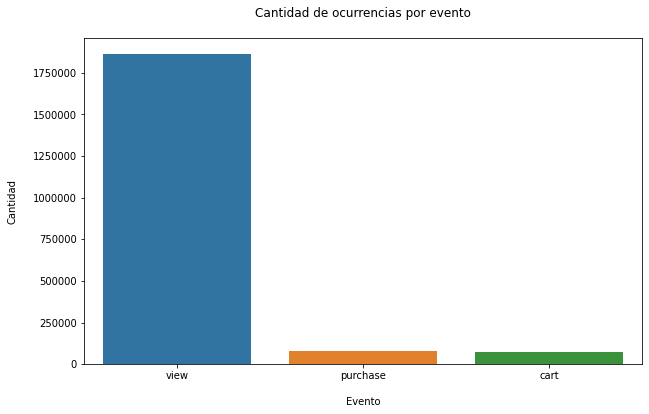

In [ ]:
#Vemos los eventos generados gráficamente 

plt.figure(figsize=(10,6))
sns.countplot(x='event_type', data=cleaned_df)
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("\nEvento")
plt.ylabel("Cantidad\n")
plt.title('Cantidad de ocurrencias por evento\n')
plt.show()

Acá podemos observar que hay mayor cantidad de eventos de compra, que productos agregados al carrito. Con esto podemos asumir que no es necesario pasar por "cart" antes de comprar, es decir, podemos ver un producto y comprarlo directamente. Para eso vamos a analizar a un usuario en particular.

In [ ]:
#Agrupamos por usuario y vemos los que tienen más de dos compras para analizar su comportamiento

df_new = cleaned_df_cart.groupby('user_id').count()
df_new = df_new[(df_new['product_id'] > 2)]
df_new.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,hour,day_of_week,day,dayofmonth
user_id,,,,,,,,,,,,
512363656,3,3,3,3,3,3,3,3,3,3,3,3
512366068,9,9,9,9,9,9,9,9,9,9,9,9
512367099,6,6,6,6,6,6,6,6,6,6,6,6
512369878,3,3,3,3,2,3,3,3,3,3,3,3
512369885,10,10,10,10,10,10,10,10,10,10,10,10


In [ ]:
#Análizamos al usuario 512369885 que tiene 12 productos comprados

print("El usuario tiene",len(cleaned_df_cart[cleaned_df_cart.user_id == 512369885]), "productos agregados al carrito")
print("El usuario tiene",len(cleaned_df_purchase[cleaned_df_purchase.user_id == 512369885]), "productos comprados")


El usuario tiene 10 productos agregados al carrito
El usuario tiene 12 productos comprados


Con esto podemos concluir que no es necesario pasar por el carrito para realizar una compra. Sin embargo sabemos que el dataset real es ampliamente mayor y con el que estamos trabajando es solo una muestra y probablemente se trate de un error. 


In [ ]:
#Vamos a analizar los días y momentos del día donde se generan mayor cantidad de vistas y compras.

intervalo_horas_compra = pd.cut(cleaned_df_purchase['hour'], bins = [-1, 6, 11, 15, 19, 24], labels=["Madrugada 0 a 6",
"Mañana 7 a 11", "Mediodía 12 a 15", "Tarde 16 a 19", "Noche 20 a 23"])

intervalo_horas_view = pd.cut(cleaned_df_view['hour'], bins = [-1, 6, 11, 15, 19, 24], labels=["Madrugada 0 a 6",
"Mañana 7 a 11", "Mediodía 12 a 15", "Tarde 16 a 19", "Noche 20 a 23"])

tabla_horas_dias_compra = pd.crosstab(intervalo_horas_compra, cleaned_df_purchase['day'])

tabla_horas_dias_view = pd.crosstab(intervalo_horas_view, cleaned_df_view['day'])

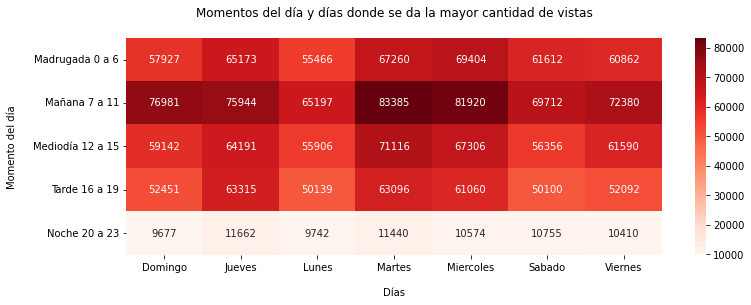

In [ ]:
plt.figure(figsize=(12,4 ))
sns.heatmap(tabla_horas_dias_view, annot = True, fmt ='g', cmap = 'Reds')
plt.xlabel("\nDías")
plt.ylabel("Momento del día\n")
plt.title('Momentos del día y días donde se da la mayor cantidad de vistas\n')
plt.show()

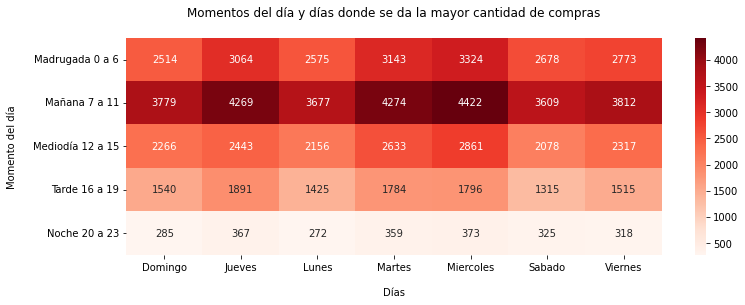

In [ ]:
plt.figure(figsize=(12,4 ))
sns.heatmap(tabla_horas_dias_compra, annot= True, fmt ='g', cmap = 'Reds')
plt.xlabel("\nDías")
plt.ylabel("Momento del día\n")
plt.title('Momentos del día y días donde se da la mayor cantidad de compras\n')
plt.show()

In [ ]:
#Calculamos la conversión de vistas a compras

round(len(cleaned_df[cleaned_df.event_type =='purchase']) / len(cleaned_df[cleaned_df.event_type =='view']),4)

0.0419

Esto significa que el 4,19% de las vistas se convirtieron en compras en el mes de octubre de 2019.

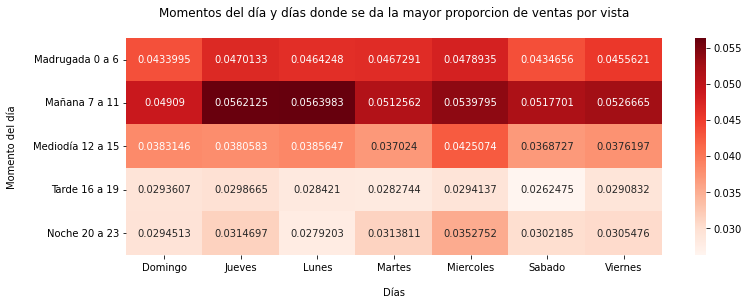

In [ ]:
#Analizamos mediante un mapa de calor las conversiones por día y momentos del día

tabla_conversion = tabla_horas_dias_compra/tabla_horas_dias_view

plt.figure(figsize=(12,4 ))
sns.heatmap(tabla_conversion, annot = True, fmt ='g', cmap = 'Reds')
plt.xlabel("\nDías")
plt.ylabel("Momento del día\n")
plt.title('Momentos del día y días donde se da la mayor proporcion de ventas por vista\n')
plt.show()

In [ ]:
# Serie de tiempo para el evento compras

time_purchase = cleaned_df_purchase.groupby(['dayofmonth']).size().reset_index(name='counts')

In [ ]:
# Serie de tiempo para el evento vistas

time_view = cleaned_df_view.groupby(['dayofmonth']).size().reset_index(name='counts')

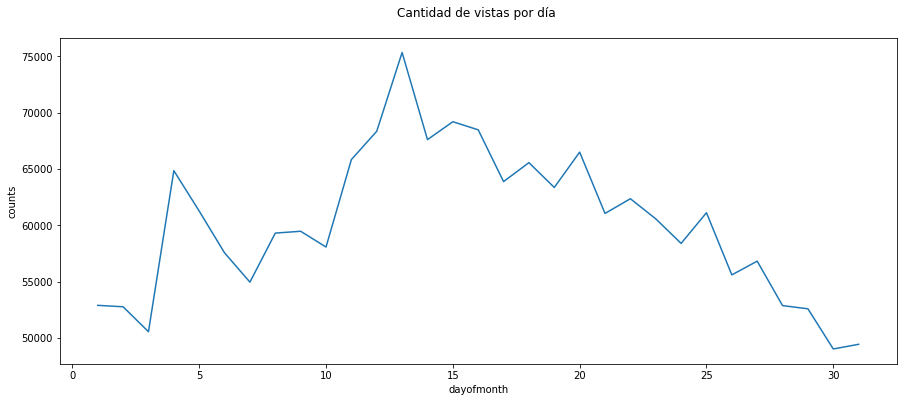

In [ ]:
#Gráficos con el comportamiento de las vistas y compras por día

plt.figure(figsize=(15,6))
plt.title('Cantidad de vistas por día \n')
sns.lineplot(data=time_view, x="dayofmonth", y="counts")
plt.show()

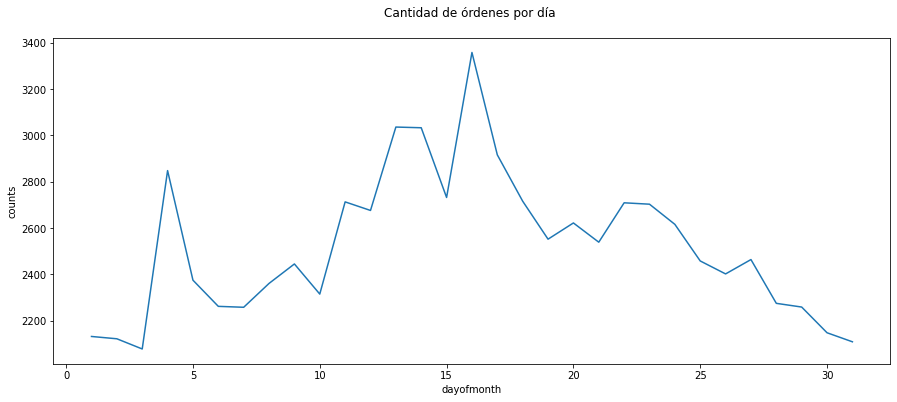

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Cantidad de órdenes por día \n')
sns.lineplot(data=time_purchase, x="dayofmonth", y="counts")
plt.show()

In [ ]:
#Análisis del evento vistas y horarios

print(stat.mode(cleaned_df_view.hour)) 
print(stat.mode(cleaned_df_view.day))

16
Martes


El horario en el cual se registra la mayor cantidad de vistas es a las 16 horas, mientras que el día en el que se registran la mayor cantidad es el día martes.


In [ ]:
#Análisis del evento compras y horarios

print(stat.mode(cleaned_df_purchase.hour)) 
print(stat.mode(cleaned_df_purchase.day))

8
Miercoles


El horario en el cual se registra la mayor cantidad de ventas es a las 8 horas, mientras que el día en el que se registran la mayor cantidad de compras es el día miércoles.

Como celulares es la categoria que mas ingresos le genera al negocio, hacemos un estudio en profunidad de la misma


In [ ]:
compras_celulares = cleaned_df[(cleaned_df['category_code']=='electronics.smartphone') & (cleaned_df['event_type'] == 'purchase')].brand.value_counts(normalize=True)

In [ ]:
df_telefonos = cleaned_df[cleaned_df["category_code"]=="electronics.smartphone"].copy()

### Calculamos la proporción de ventas en monto de ventas (Pesos) y en unidades (Q) por categoría y marca <a name="q5"></a>

 
Vamos a analizar las categorías y marcas que mayor cantidad de ingresos generan y mayor cantidad de productos vendidos poseen.

Para esto creamos una función que agrupe las ventas y cantidades vendidas por categoría y brand. Luego calculamos la proporción de ventas por categoría.


In [ ]:
print("El monto total de ventas fue de: $", round(sum(cleaned_df_purchase.price),2))

El monto total de ventas fue de: $ 24144140.88


In [ ]:
def valores(df, valor1='brand'):
    return df.groupby(['brand'])['price'].sum().sort_values(ascending=False), cleaned_df_purchase['brand'].value_counts()

In [ ]:
a,b = valores(cleaned_df_purchase, 'brand')

In [ ]:
df_new = pd.merge(left=a, right=b,
how='outer', left_index=True,
right_index=True)

In [ ]:
brand_vtas = df_new.sort_values('price',ascending=False)

In [ ]:
brand_vtas['proporcion_vta_$'] = brand_vtas['price']/round(sum(cleaned_df_purchase.price),2)
brand_vtas['proporcion_vta_unidades'] = brand_vtas['brand']/len(cleaned_df_purchase)
brand_vtas

,price,brand,proporcion_vta_$,proporcion_vta_unidades
apple,11522826.350,15013,0.477,0.192
samsung,4946155.600,18540,0.205,0.237
xiaomi,968891.920,5900,0.040,0.075
huawei,520163.940,2470,0.022,0.032
acer,356417.370,701,0.015,0.009
...,...,...,...,...
boyscout,2.550,1,0.000,0.000
purederm,2.180,1,0.000,0.000
heinz,2.160,2,0.000,0.000
feron,1.930,1,0.000,0.000


In [ ]:
brand_vta_p=brand_vtas[0:5].copy()

In [ ]:
brand_vta_p.reset_index(inplace=True)

In [ ]:
brand_vta_p.rename(columns={'index':'brands','price':'amount','brand':'units'},
               inplace=True)

In [ ]:
brand_vta_p

,brands,amount,units,proporcion_vta_$,proporcion_vta_unidades
0,apple,11522826.350,15013,0.477,0.192
1,samsung,4946155.600,18540,0.205,0.237
2,xiaomi,968891.920,5900,0.040,0.075
3,huawei,520163.940,2470,0.022,0.032
4,acer,356417.370,701,0.015,0.009


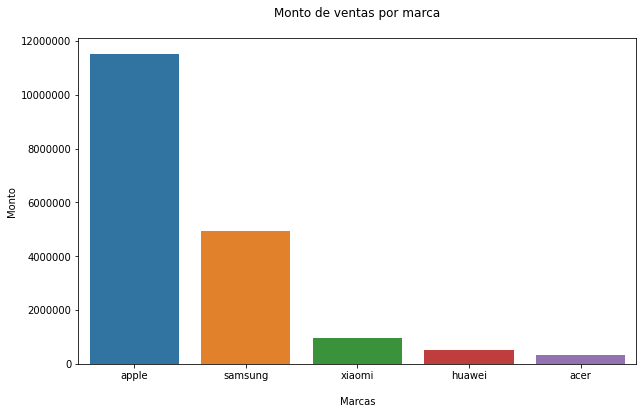

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="brands", y="amount", data=brand_vta_p)
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("\nMarcas")
plt.ylabel("Monto")
plt.title('Monto de ventas por marca\n')
plt.show()

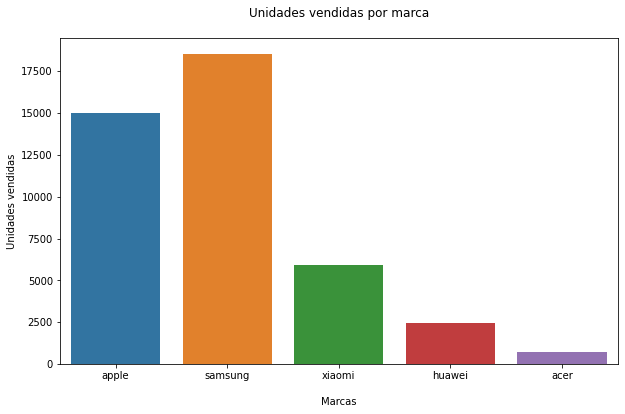

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="brands", y="units", data=brand_vta_p)
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("\nMarcas")
plt.ylabel("Unidades vendidas")
plt.title('Unidades vendidas por marca\n')
plt.show()
plt.figure(figsize=(10,6))

In [ ]:
def valores2(df, valor1='category_code'):
    return df.groupby(['category_code'])['price'].sum().sort_values(ascending=False), cleaned_df_purchase['category_code'].value_counts()

In [ ]:
e,f = valores2(cleaned_df_purchase, 'category_code')

In [ ]:
df_new_cat = pd.merge(left=e, right=f,
how='outer', left_index=True,
right_index=True)

In [ ]:
category_vtas = df_new_cat.sort_values('price',ascending=False)

In [ ]:
category_vtas['proporcion_vta_p'] = category_vtas['price']/round(sum(cleaned_df_purchase.price),2)
category_vtas['proporcion_vta_unidades'] = category_vtas['category_code']/len(cleaned_df_purchase)
category_vtas

,price,category_code,proporcion_vta_p,proporcion_vta_unidades
electronics.smartphone,16503311.320,35988,0.684,0.460
computers.notebook,903253.820,1570,0.037,0.020
electronics.video.tv,874852.690,2283,0.036,0.029
electronics.clocks,485147.480,1822,0.020,0.023
appliances.kitchen.washer,464798.070,1605,0.019,0.021
...,...,...,...,...
apparel.sock,55.310,2,0.000,0.000
apparel.belt,51.480,2,0.000,0.000
apparel.scarf,50.960,2,0.000,0.000
apparel.shoes.ballet_shoes,23.170,1,0.000,0.000


In [ ]:
category_vtas_p=category_vtas[0:5].copy()

In [ ]:
category_vtas_p.reset_index(inplace=True)

In [ ]:
category_vtas_p.rename(columns={'index':'category','price':'amount','category_code':'units'},
               inplace=True)

In [ ]:
category_vtas_p

,category,amount,units,proporcion_vta_p,proporcion_vta_unidades
0,electronics.smartphone,16503311.320,35988,0.684,0.460
1,computers.notebook,903253.820,1570,0.037,0.020
2,electronics.video.tv,874852.690,2283,0.036,0.029
3,electronics.clocks,485147.480,1822,0.020,0.023
4,appliances.kitchen.washer,464798.070,1605,0.019,0.021


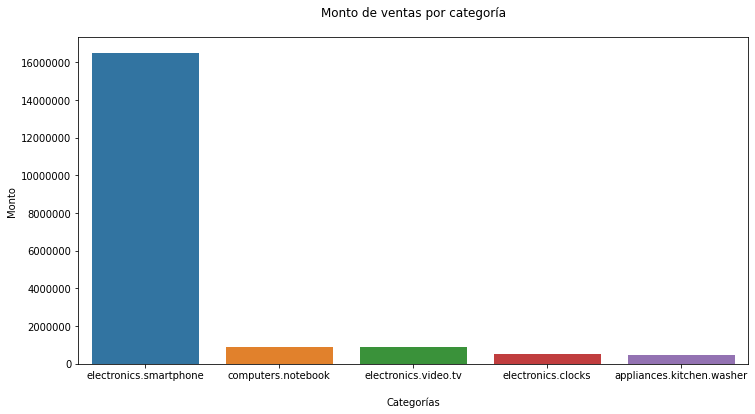

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="category", y="amount", data=category_vtas_p)
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("\nCategorías")
plt.ylabel("Monto")
plt.title('Monto de ventas por categoría\n')
plt.show()

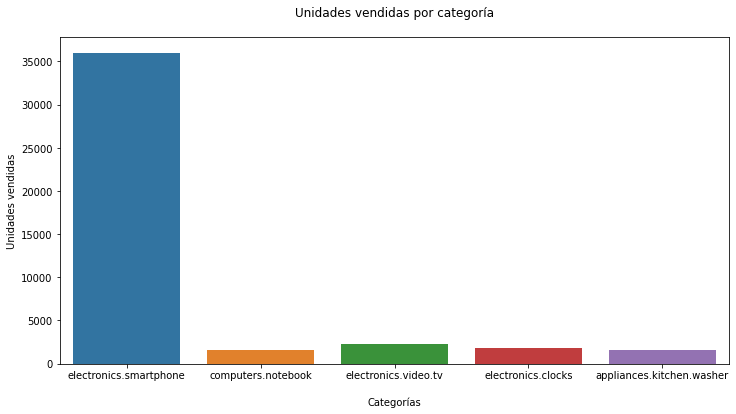

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="category", y="units", data=category_vtas_p)
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("\nCategorías")
plt.ylabel("Unidades vendidas")
plt.title('Unidades vendidas por categoría\n')
plt.show()

A raiz de que la categoria que más ingresos le significan al negocio es "electronics.smartphone", hacemos un análisis particular, en funcion de las marcas que estan incluidas en la misma.


In [ ]:
cleaned_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week,day,dayofmonth
35424599,2019-10-26 11:31:49,view,2701884,2053013563911439225,appliances.kitchen.refrigerators,beko,539.430,545113235,a76b16f6-99e8-4568-91ba-8d0594f6dc8c,11,5,Sabado,26
33954915,2019-10-25 10:47:09,view,47900002,2116907525201723525,None,tacx,154.190,546093570,4106f0e7-6464-4e7a-a96d-6942b765df15,10,4,Viernes,25
3239063,2019-10-03 15:50:59,view,1003317,2053013555631882655,electronics.smartphone,apple,965.020,521171518,4069de18-c57b-4c5f-b96a-530af56e2af8,15,3,Jueves,3
18744048,2019-10-14 18:05:20,view,4802233,2053013554658804075,electronics.audio.headphone,jbl,46.080,559456286,e2120413-0bbb-42cb-9205-49d92457a5cf,18,0,Lunes,14
6966925,2019-10-06 11:45:33,view,1005153,2053013555631882655,electronics.smartphone,xiaomi,231.640,533559597,a6ee7e6a-8849-4c8c-8cb7-c76bd0e85e87,11,6,Domingo,6


In [ ]:
cleaned_df_smartphone = cleaned_df[(cleaned_df['category_code']=='electronics.smartphone')].copy()

In [ ]:
freq_smartphone = cleaned_df_smartphone['brand'].value_counts(normalize = True)

In [ ]:
smartphone_less_sold = freq_smartphone.loc[freq_smartphone<0.041].index

In [ ]:
cleaned_df_smartphone.brand.value_counts(normalize=True)

samsung      0.345
apple        0.286
xiaomi       0.187
huawei       0.083
oppo         0.039
meizu        0.013
vivo         0.010
nokia        0.006
honor        0.006
sony         0.005
oneplus      0.005
lg           0.002
bq           0.002
doogee       0.002
tp-link      0.002
inoi         0.001
prestigio    0.001
google       0.001
zte          0.001
haier        0.001
asus         0.000
tecno        0.000
jinga        0.000
umi          0.000
gionee       0.000
irbis        0.000
htc          0.000
fly          0.000
blackberry   0.000
nubia        0.000
texet        0.000
leeco        0.000
philips      0.000
vertex       0.000
micromax     0.000
oukitel      0.000
hiper        0.000
leagoo       0.000
motorola     0.000
Name: brand, dtype: float64

In [ ]:
cleaned_df_smartphone.loc[cleaned_df_smartphone.brand.isin(smartphone_less_sold),"brand"] = "Other"

Ahora calcularemos la distribucion de las cantidades vendidas, vistas y de carritos por marcas de smartphones

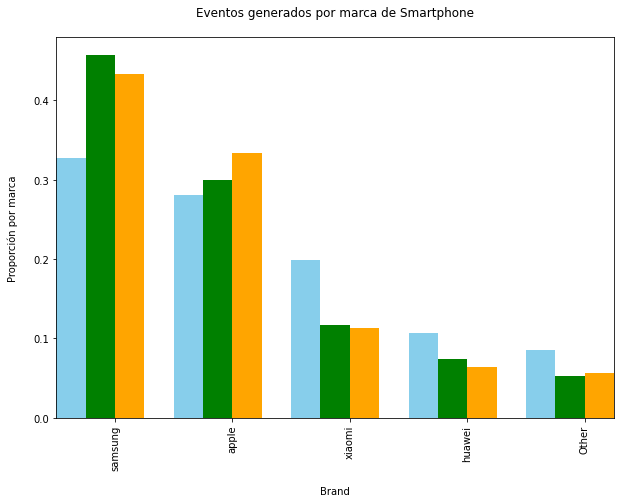

In [ ]:
df_summary= cleaned_df_smartphone.groupby('event_type')['brand'].value_counts(normalize=True)

df_summary['view'].plot(kind='bar',position=2, color='skyblue',figsize=(10,7),width=.25,label = 'vistas')
df_summary['purchase'].plot(kind='bar',position=0, width=.25,color='orange', label = 'compras')
df_summary['cart'].plot(kind='bar',position=1, width=.25,color='green', label = 'carrito')
plt.xlabel("\nBrand")
plt.ylabel("Proporción por marca\n")
plt.title('Eventos generados por marca de Smartphone\n')
plt.show()
plt.legend=True



Notamos que las 2 primeras marcas mas compradas(samsung, apple) tienen una proporcion de ventas mayor a la proporcion de vistas totales. es decir, tiene un ratio de conversion mucho mayor que las segundas marcas.